## Import required modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, ZeroPadding2D
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from keras.models import load_model
import datetime
import warnings
warnings.filterwarnings('ignore')

## Read image data using Keras Image Data Generator

In [2]:
# Initialize Image Data Generator
datagen = ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            rotation_range=45)

# Read train data
trainData = datagen.flow_from_directory(directory=r'Images\Train',
                                        batch_size=32,
                                        shuffle=False,
                                        target_size=(180,180),
                                        class_mode='categorical',
                                        color_mode='grayscale')

# Read test data
testData = datagen.flow_from_directory(directory=r'Images\Test',
                                        batch_size=32,
                                        shuffle=False,
                                        target_size=(180,180),
                                        class_mode='categorical',
                                        color_mode='grayscale')

# Read validation data
valData = datagen.flow_from_directory(directory=r'Images\Val',
                                        batch_size=32,
                                        shuffle=False,
                                        target_size=(180,180),
                                        class_mode='categorical',
                                        color_mode='grayscale')

# Print labels for all data generators
print('Train Data Labels :', trainData.class_indices)
print('Test Data Labels :', testData.class_indices)
print('Validation Data Labels :', valData.class_indices)

Found 1500 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Train Data Labels : {'Normal': 0, 'Pneumonia': 1, 'Tuberculosis': 2}
Test Data Labels : {'Normal': 0, 'Pneumonia': 1, 'Tuberculosis': 2}
Validation Data Labels : {'Normal': 0, 'Pneumonia': 1, 'Tuberculosis': 2}


## Model Initialization

In [3]:
model = Sequential()
model.add(Input((180,180,1)))
model.add(ZeroPadding2D((3,3)))

# Block 1
model.add(Conv2D(32, (2,2), activation='relu'))
model.add(Conv2D(32, (2,2), activation='relu'))
model.add(MaxPool2D((3,3)))

# Block 2
model.add(Conv2D(64, (2,2), activation='relu'))
model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPool2D((3,3)))

# Block 3
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(3,3))

# Block 4
model.add(Conv2D(8, (3,3)))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 186, 186, 1)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 185, 185, 32)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 184, 184, 32)      4128      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        8256      
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 59, 64)        1

## Model Training

In [5]:
checkpoint = ModelCheckpoint(filepath=r'models/customModel_bestModel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit_generator(generator=trainData, epochs=50, validation_data=valData, callbacks=[checkpoint])

Epoch 1/50
47/47 [==============================] - ETA: 0s - loss: 1.1070 - accuracy: 0.3400
Epoch 1: val_loss improved from inf to 1.09592, saving model to models\customModel_bestModel.hdf5
47/47 [==============================] - 15s 255ms/step - loss: 1.1070 - accuracy: 0.3400 - val_loss: 1.0959 - val_accuracy: 0.6000
Epoch 2/50
47/47 [==============================] - ETA: 0s - loss: 1.0985 - accuracy: 0.4027
Epoch 2: val_loss improved from 1.09592 to 1.07434, saving model to models\customModel_bestModel.hdf5
47/47 [==============================] - 11s 228ms/step - loss: 1.0985 - accuracy: 0.4027 - val_loss: 1.0743 - val_accuracy: 0.6333
Epoch 3/50
47/47 [==============================] - ETA: 0s - loss: 1.0829 - accuracy: 0.5420
Epoch 3: val_loss improved from 1.07434 to 0.89752, saving model to models\customModel_bestModel.hdf5
47/47 [==============================] - 11s 222ms/step - loss: 1.0829 - accuracy: 0.5420 - val_loss: 0.8975 - val_accuracy: 0.6000
Epoch 4/50
47/47 [==

## Plotting accuracy and loss graphs

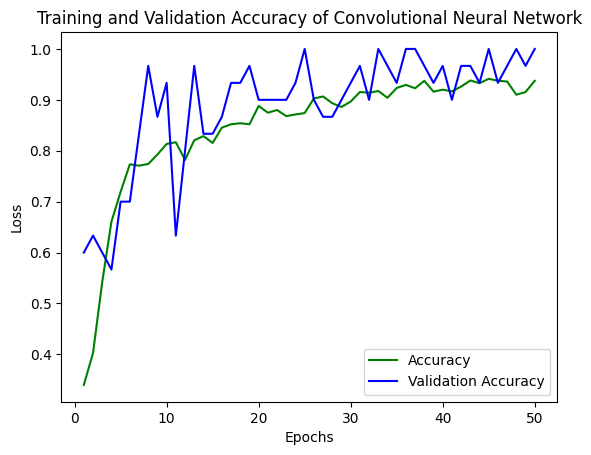

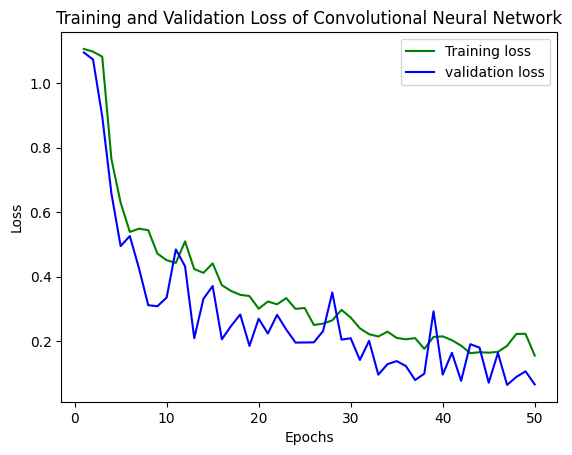

In [6]:
# Training and Validation Accuracy Graph
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of Convolutional Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph
train = history.history['loss']
val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation Loss of Convolutional Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluating Fully Trained Custom CNN Model

Training Data Metrics :
Accuracy Score : 0.94
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       500
           1       0.99      0.96      0.97       500
           2       0.90      0.94      0.92       500

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.94      0.94      1500



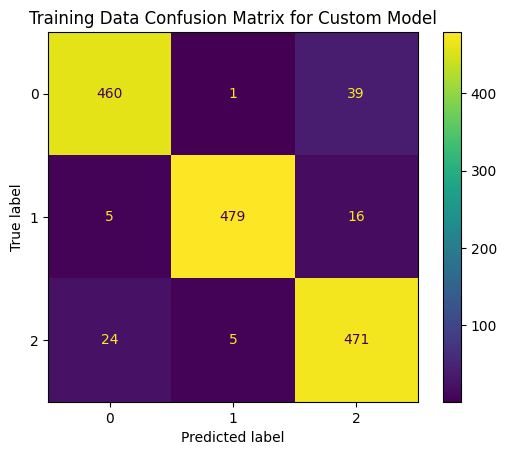





Validation Data Metrics :
Accuracy Score : 0.9333333333333333
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       1.00      1.00      1.00        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



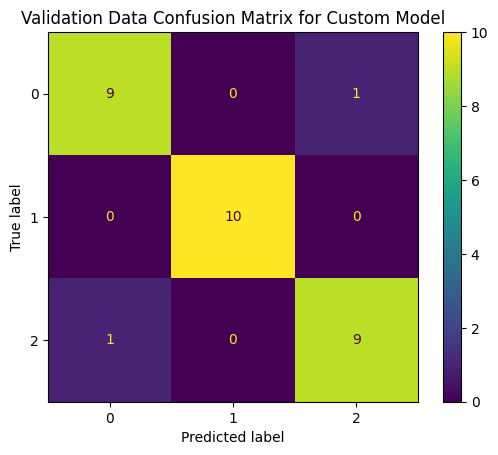





Testing Data Metrics :
Accuracy Score : 0.92
Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       100
           1       0.98      0.95      0.96       100
           2       0.88      0.91      0.89       100

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



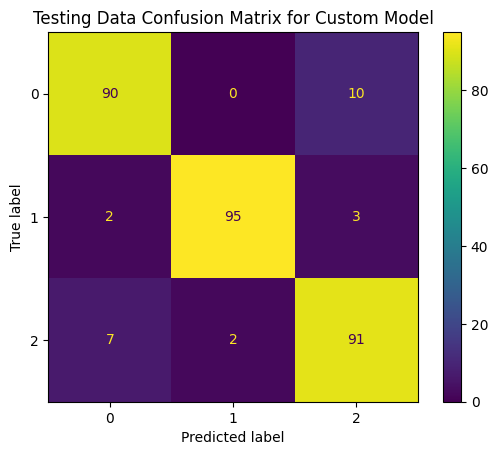

In [7]:
# Metrics used for evaluation:
# Accuracy Score
# Classification Report (Precision, Recall, F1 Score)
# Confusion Matrix

# Make predictions
testPred = np.argmax(model.predict_generator(testData), axis=1)
trainPred = np.argmax(model.predict_generator(trainData), axis=1)
valPred = np.argmax(model.predict_generator(valData), axis=1)

# Evaluating Training Data
print('Training Data Metrics :')
print('Accuracy Score :', accuracy_score(trainData.labels, trainPred))
creport = classification_report(trainData.labels, trainPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(trainData.labels, trainPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Training Data Confusion Matrix for Custom Model')
plt.show()

# Evaluating Validation Data
print('\n\n\n')
print('Validation Data Metrics :')
print('Accuracy Score :', accuracy_score(valData.labels, valPred))
creport = classification_report(valData.labels, valPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(valData.labels, valPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Validation Data Confusion Matrix for Custom Model')
plt.show()

# Evaluating Testing Data
print('\n\n\n')
print('Testing Data Metrics :')
print('Accuracy Score :', accuracy_score(testData.labels, testPred))
creport = classification_report(testData.labels, testPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(testData.labels, testPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Testing Data Confusion Matrix for Custom Model')
plt.show()

model.save(r'models/customModel_FullyTrained.hdf5')
model.save_weights(r'models/customModel_FullyTrained_weights.hdf5')

## Evaluating Best Saved Custom CNN Model

Training Data Metrics :
Accuracy Score : 0.936
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       500
           1       0.97      0.98      0.98       500
           2       0.88      0.94      0.91       500

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.94      0.94      1500



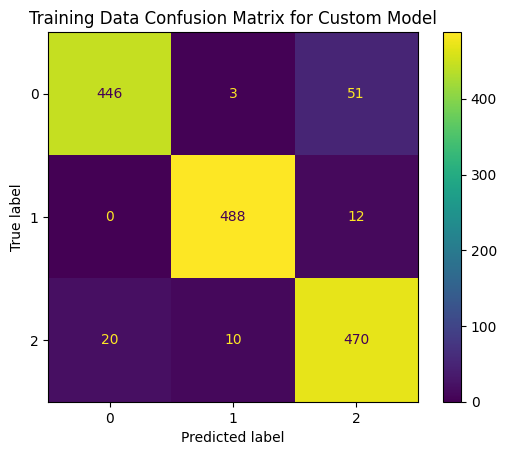





Validation Data Metrics :
Accuracy Score : 1.0
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



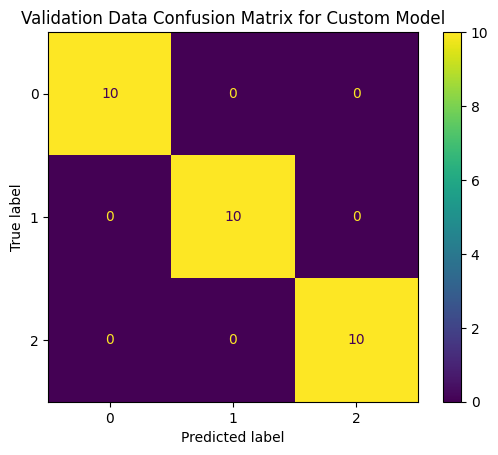





Testing Data Metrics :
Accuracy Score : 0.89
Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       100
           1       0.96      0.91      0.93       100
           2       0.80      0.91      0.85       100

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



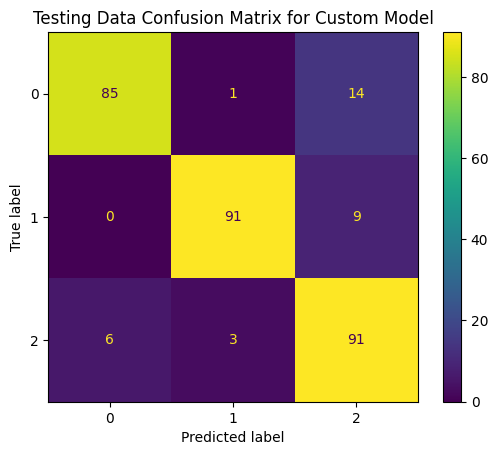

In [8]:
# Metrics used for evaluation:
# Accuracy Score
# Classification Report (Precision, Recall, F1 Score)
# Confusion Matrix

# Load the best model and save the weights of it
model = load_model(r'models/customModel_bestModel.hdf5')
model.save_weights(r'models/customModel_bestModel_weights.hdf5')

# Make predictions
testPred = np.argmax(model.predict_generator(testData), axis=1)
trainPred = np.argmax(model.predict_generator(trainData), axis=1)
valPred = np.argmax(model.predict_generator(valData), axis=1)

# Evaluating Training Data
print('Training Data Metrics :')
print('Accuracy Score :', accuracy_score(trainData.labels, trainPred))
creport = classification_report(trainData.labels, trainPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(trainData.labels, trainPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Training Data Confusion Matrix for Custom Model')
plt.show()

# Evaluating Validation Data
print('\n\n\n')
print('Validation Data Metrics :')
print('Accuracy Score :', accuracy_score(valData.labels, valPred))
creport = classification_report(valData.labels, valPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(valData.labels, valPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Validation Data Confusion Matrix for Custom Model')
plt.show()

# Evaluating Testing Data
print('\n\n\n')
print('Testing Data Metrics :')
print('Accuracy Score :', accuracy_score(testData.labels, testPred))
creport = classification_report(testData.labels, testPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(testData.labels, testPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Testing Data Confusion Matrix for Custom Model')
plt.show()